

#### Project Description:
    
The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers. We've been given a database of one of the services competing in this market. It contains data on books, publishers, authors, and customer ratings and reviews of books. This information will be used to generate a value proposition for a new product.
    
 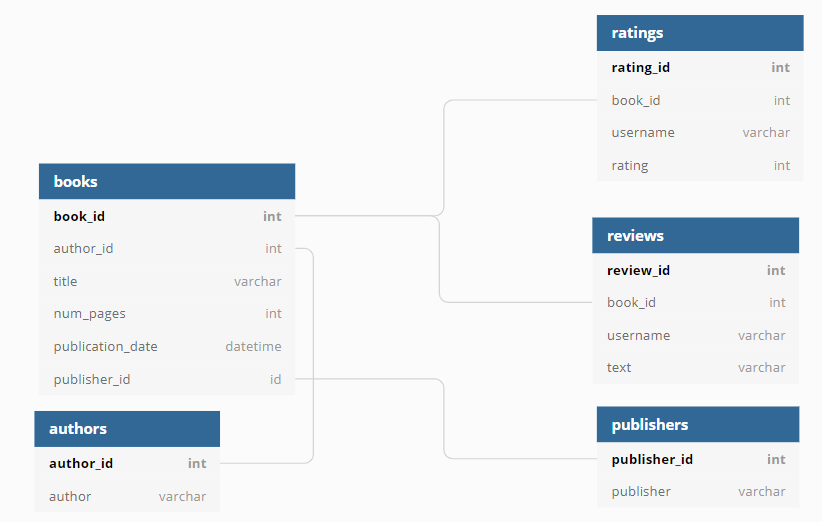
    
    
#### Task :
    
1. Find the number of books released after January 1, 2000.
1. Find the number of user reviews and the average rating for each book.
1. Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude 1. brochures and similar publications from your analysis).
1. Identify the author with the highest average book rating: look only at books with at least 50 ratings.
1. Find the average number of text reviews among users who rated more than 50 books.
    
#### Instructions for completing the task :
    
1. Describe the goals of the study.
1. Study the tables (print the first rows).
1. Make an SQL query for each of the tasks.
1. Output the results of each query in the Notebook.
1. Describe your conclusions for each of the tasks.

In [1]:
#pip install psycopg2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import psycopg2
from psycopg2 import Error

In [3]:
db_config = {'user': 'praktikum_student',         # user name
             'pwd': 'Sdf4$2;d-d30pp', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the data base

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})



### Engine connect:

In [4]:
connect = engine.connect()



### All table names:

In [5]:
engine.table_names()

<ipython-input-5-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['orders',
 'visits',
 'advertisment_costs',
 'publishers',
 'authors',
 'reviews',
 'ratings',
 'books']



### Query to load all the data inside the tables

In [6]:
orders_data = f'''SELECT *
         FROM orders
         '''
#----------------------------
visits_data = f'''SELECT *
         FROM visits
         '''
#--------------------------
advertisment_costs_data = f'''SELECT *
         FROM advertisment_costs
         '''
#----------------------------
publishers_data = f'''SELECT *
         FROM publishers
         '''
#---------------------------
authors_data = f'''SELECT *
         FROM authors
         '''
#--------------------------
reviews_data = f'''SELECT *
         FROM reviews
         '''
#-------------------------
ratings_data = f'''SELECT *
         FROM ratings
         '''
#------------------------
books_data =  f'''SELECT *
         FROM books
         '''



### Load all the data inside the tables

In [7]:
orders = pd.read_sql(orders_data,engine)
visits = pd.read_sql(visits_data,engine)
advertisment_costs = pd.read_sql(advertisment_costs_data,engine)
publishers = pd.read_sql(publishers_data,engine)
authors = pd.read_sql(authors_data,engine)
reviews = pd.read_sql(reviews_data,engine)
ratings = pd.read_sql(ratings_data,engine)
books = pd.read_sql(books_data,engine)

In [8]:
display(orders.head())

,id,buyts,revenue,uid
0,1,2017-06-01 00:10:00,$17.00,10329302124590727494
1,2,2017-06-01 00:25:00,$0.55,11627257723692907447
2,3,2017-06-01 00:27:00,$0.37,17903680561304213844
3,4,2017-06-01 00:29:00,$0.55,16109239769442553005
4,5,2017-06-01 07:58:00,$0.37,14200605875248379450


In [9]:
display(visits.head())

,id,uid,device,endts,sourceid,startts
0,0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00
1,1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00
2,2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00
3,3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00
4,4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00


In [10]:
display(advertisment_costs.head())

,id,sourceid,dt,costs
0,1,1,2017-06-01,$75.20
1,2,1,2017-06-02,$62.25
2,3,1,2017-06-03,$36.53
3,4,1,2017-06-04,$55.00
4,5,1,2017-06-05,$57.08


In [11]:
display(publishers.head())

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [12]:
display(authors.head())

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [13]:
display(reviews.head())

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [14]:
display(ratings.head())

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [15]:
display(books.head())
display(books.info())

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None



### Find the number of books released after January 1, 2000.

In [16]:
query = f'''
         SELECT COUNT(book_id)
         FROM books 
         WHERE publication_date > '2000-01-01'
         '''
result = pd.io.sql.read_sql(query ,engine)
display(result)
print('The number of books released after January 1st, 2000 is: ' + str(result['count'][0]))

,count
0,819


The number of books released after January 1st, 2000 is: 819




* Conclusion:
    
The number of books released after January 1st, 2000 is: 819



### Find the number of user reviews and the average rating for each book.

,title,avg_rating,num_reviews
0,Twilight (Twilight #1),3.662500,7
1,The Road,3.772727,6
2,The Book Thief,4.264151,6
3,The Glass Castle,4.206897,6
4,Water for Elephants,3.977273,6
5,The Da Vinci Code (Robert Langdon #2),3.830508,6
6,The Catcher in the Rye,3.825581,6
7,The Curious Incident of the Dog in the Night-Time,4.081081,6
8,Outlander (Outlander #1),4.125000,6
9,Harry Potter and the Chamber of Secrets (Harry...,4.287500,6


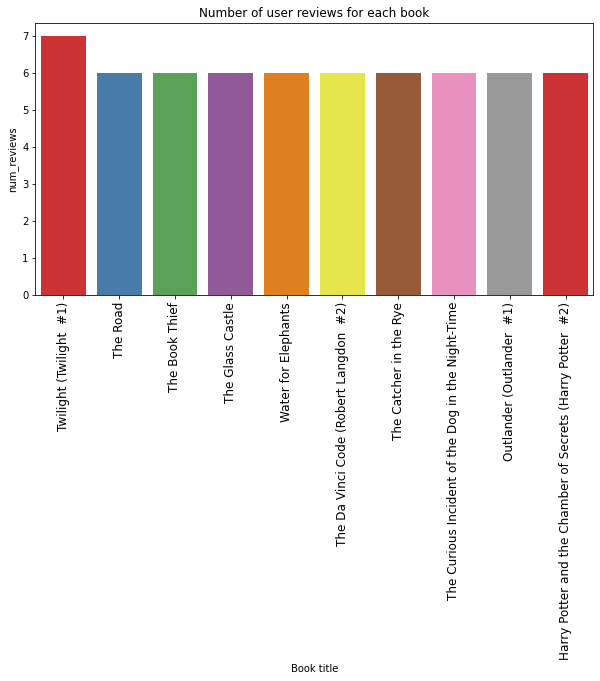

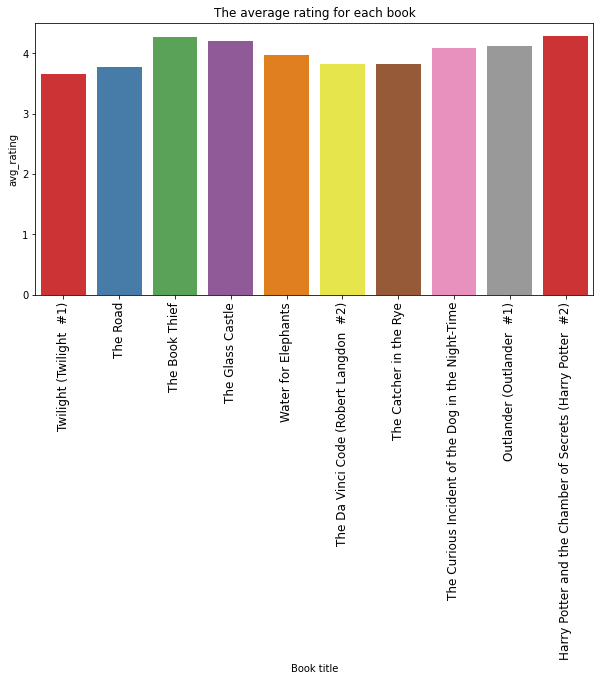

In [17]:
query = f''' 
            SELECT books.title AS title,
            AVG(ratings.rating) as avg_rating,
            COUNT( DISTINCT reviews.review_id) as num_reviews
            FROM books
            INNER JOIN ratings on ratings.book_id = books.book_id
            INNER JOIN reviews on reviews.book_id = books.book_id
            GROUP BY books.book_id
            ORDER BY num_reviews DESC'''

result = pd.io.sql.read_sql(query ,engine)
result = result.head(10)
display(result)
#-------------------------------------------------------
plt.figure(figsize=(10,5))
chart= sns.barplot(x='title',y='num_reviews',data=result, palette="Set1")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontweight='light',fontsize='large')
chart.set_title('Number of user reviews for each book')
chart.set_xlabel('Book title')
plt.show()

#-----------------------------------------------------
plt.figure(figsize=(10,5))
chart_1= sns.barplot(x='title', y='avg_rating',data=result, palette="Set1")
chart_1.set_xticklabels(chart_1.get_xticklabels(), rotation=90,fontweight='light',fontsize='large')
chart_1.set_title('The average rating for each book')
chart_1.set_xlabel('Book title')
plt.show()





* Conclusion:
    
The table above displays the query results for the number of user reviews and the average ratings for the top 10 books.



### Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).

In [18]:
query = f'''
         SELECT publishers.publisher AS publisher_name ,COUNT(books.book_id) AS num_book
         FROM books 
         INNER JOIN  
         publishers ON publishers.publisher_id=books.publisher_id
         WHERE
         books.num_pages > 50
         GROUP BY
         publisher_name
         ORDER BY
         num_book DESC
         LIMIT 1;
         
         '''
result = pd.read_sql(query ,engine)
display(result)

,publisher_name,num_book
0,Penguin Books,42




* Conclusion:

The table above displays the top 10 publishers who released the greatest number of books with more than 50 pages.



### Identify the author with the highest average book rating (look only at books with at least 50 ratings).

In [19]:
query = f'''
         
            SELECT 
            authors.author as author_name,
            AVG(ratings.rating) as avg_rating
            FROM authors
            INNER JOIN books on books.author_id = authors.author_id
            INNER JOIN ratings on ratings.book_id = books.book_id
            GROUP BY author_name
            HAVING COUNT(ratings.rating) > 50
            ORDER BY avg_rating DESC
            LIMIT 1;
                '''
result = pd.read_sql(query ,engine)
display(result)



,author_name,avg_rating
0,J.K. Rowling/Mary GrandPré,4.288462




* Conclusion:
    
The table above displays the authors with the highest average book rating for books only with greater than 50 pages.



### Find the average number of text reviews among users who rated more than 50 books. 

In [20]:
query = ''' 
           SELECT
           AVG(review_cnt) as avg_review_cnt
           FROM
           (SELECT
           COUNT(review_id) as review_cnt
           FROM
           reviews
           WHERE username IN
           (SELECT
           username
           FROM
           ratings
           GROUP BY
           username
           HAVING
           COUNT(ratings) > 50)
           GROUP BY
           username) as sub_review_cnt 
            
            '''


result = pd.read_sql(query ,engine)
display(result)

,avg_review_cnt
0,24.333333




* Conclusion:
    
The table above shows the average number of text reviews among users who rated more than 50 books.